BUILDING CNN

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Load data

In [2]:
import tensorflow.keras

In [3]:
(X_train, y_train), (X_test, y_test) =keras.datasets.fashion_mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

In [8]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

Image show

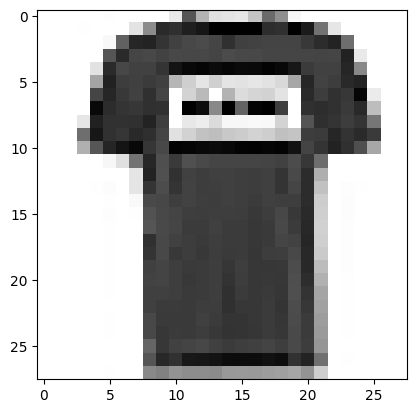

In [9]:
plt.imshow(X_train[1], cmap='Greys')

In [10]:
class_labels[y_train[1]]

'T-shirt/top'

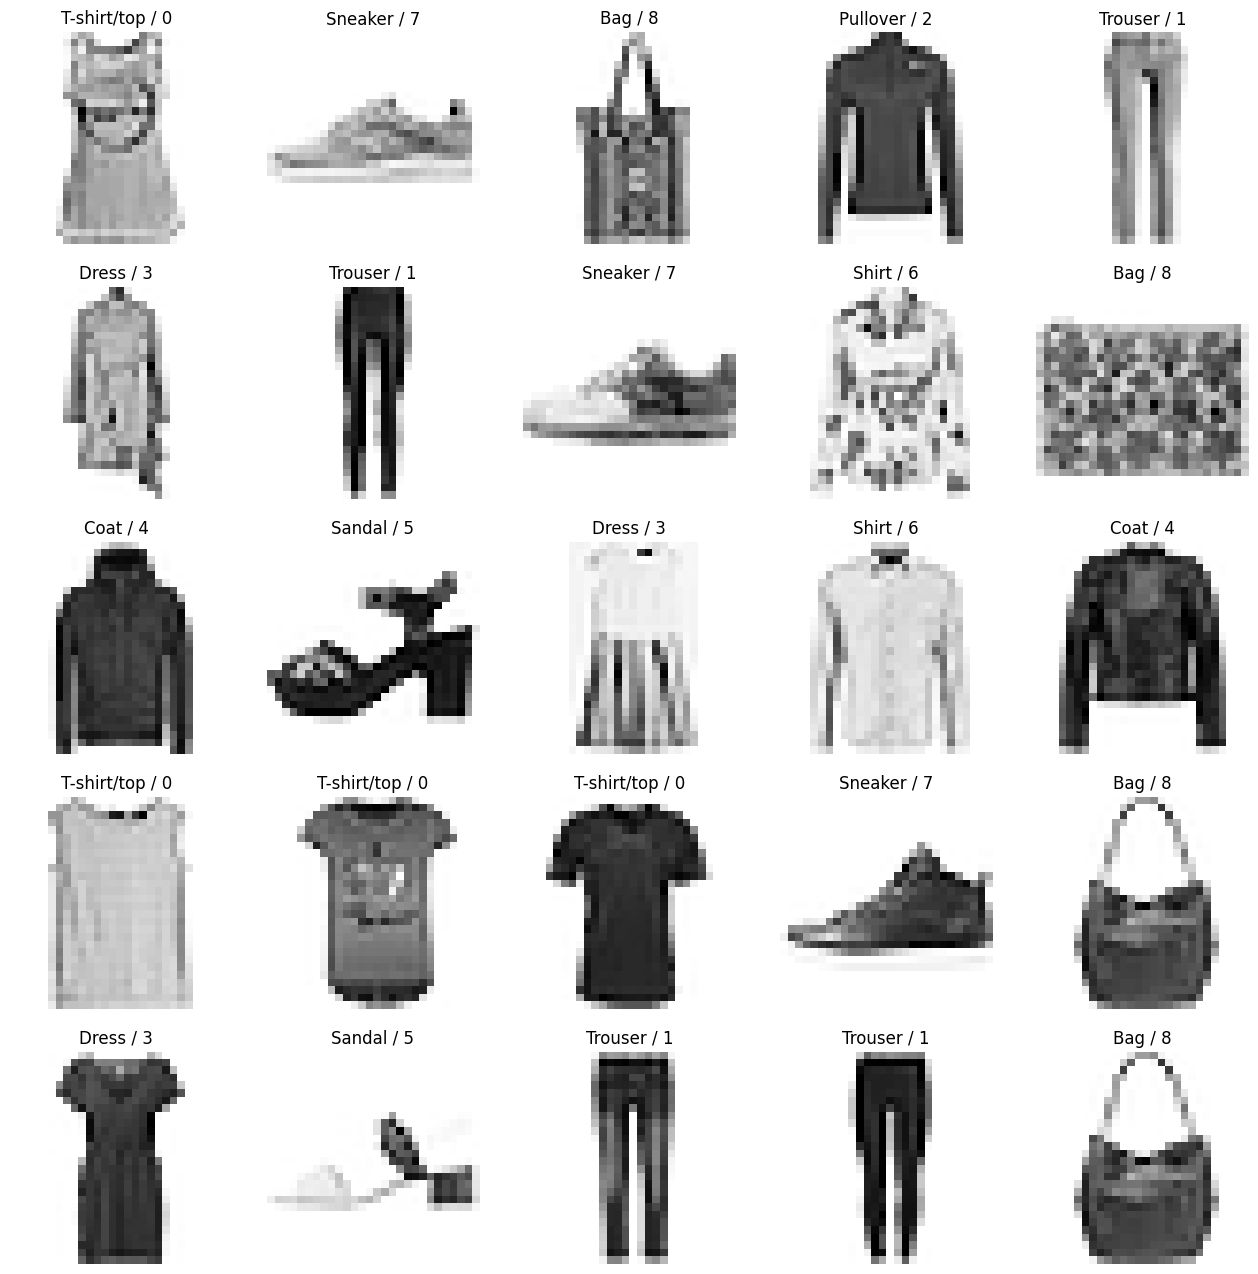

In [11]:
plt.figure(figsize=(16,16))
 
j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

Change dimension

In [12]:
X_train.ndim

3

In [13]:
X_train=np.expand_dims(X_train, -1)
X_test=np.expand_dims(X_test, -1)

In [14]:
X_train.ndim

4

In [15]:
X_train.shape

(60000, 28, 28, 1)

Feature scaling

In [16]:
X_train=X_train/255
X_test=X_test/255

Split dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [18]:
X_train.shape, y_train.shape

((48000, 28, 28, 1), (48000,))

In [19]:
X_val.shape, y_val.shape

((12000, 28, 28, 1), (12000,))

CNN building

In [20]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=40, batch_size=512, verbose=1, validation_data=(X_val,y_val))

Epoch 1/40
94/94 [==============================] - 11s 30ms/step - loss: 0.6271 - accuracy: 0.7897 - val_loss: 0.4193 - val_accuracy: 0.8554
Epoch 2/40
94/94 [==============================] - 2s 24ms/step - loss: 0.3834 - accuracy: 0.8660 - val_loss: 0.3658 - val_accuracy: 0.8721
Epoch 3/40
94/94 [==============================] - 2s 19ms/step - loss: 0.3324 - accuracy: 0.8846 - val_loss: 0.3280 - val_accuracy: 0.8851
Epoch 4/40
94/94 [==============================] - 2s 23ms/step - loss: 0.3039 - accuracy: 0.8925 - val_loss: 0.3265 - val_accuracy: 0.8829
Epoch 5/40
94/94 [==============================] - 2s 21ms/step - loss: 0.2825 - accuracy: 0.9010 - val_loss: 0.3063 - val_accuracy: 0.8924
Epoch 6/40
94/94 [==============================] - 2s 17ms/step - loss: 0.2647 - accuracy: 0.9063 - val_loss: 0.2966 - val_accuracy: 0.8953
Epoch 7/40
94/94 [==============================] - 2s 22ms/step - loss: 0.2549 - accuracy: 0.9099 - val_loss: 0.2798 - val_accuracy: 0.9013
Epoch 8/40
9

Model testing

In [24]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 169ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 36ms/step


9

In [26]:
y_test[0]

9

In [27]:
y_pred=model.predict(X_test).round(2)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3172 - accuracy: 0.9136


[0.3172115385532379, 0.9136000275611877]

Visulaize output

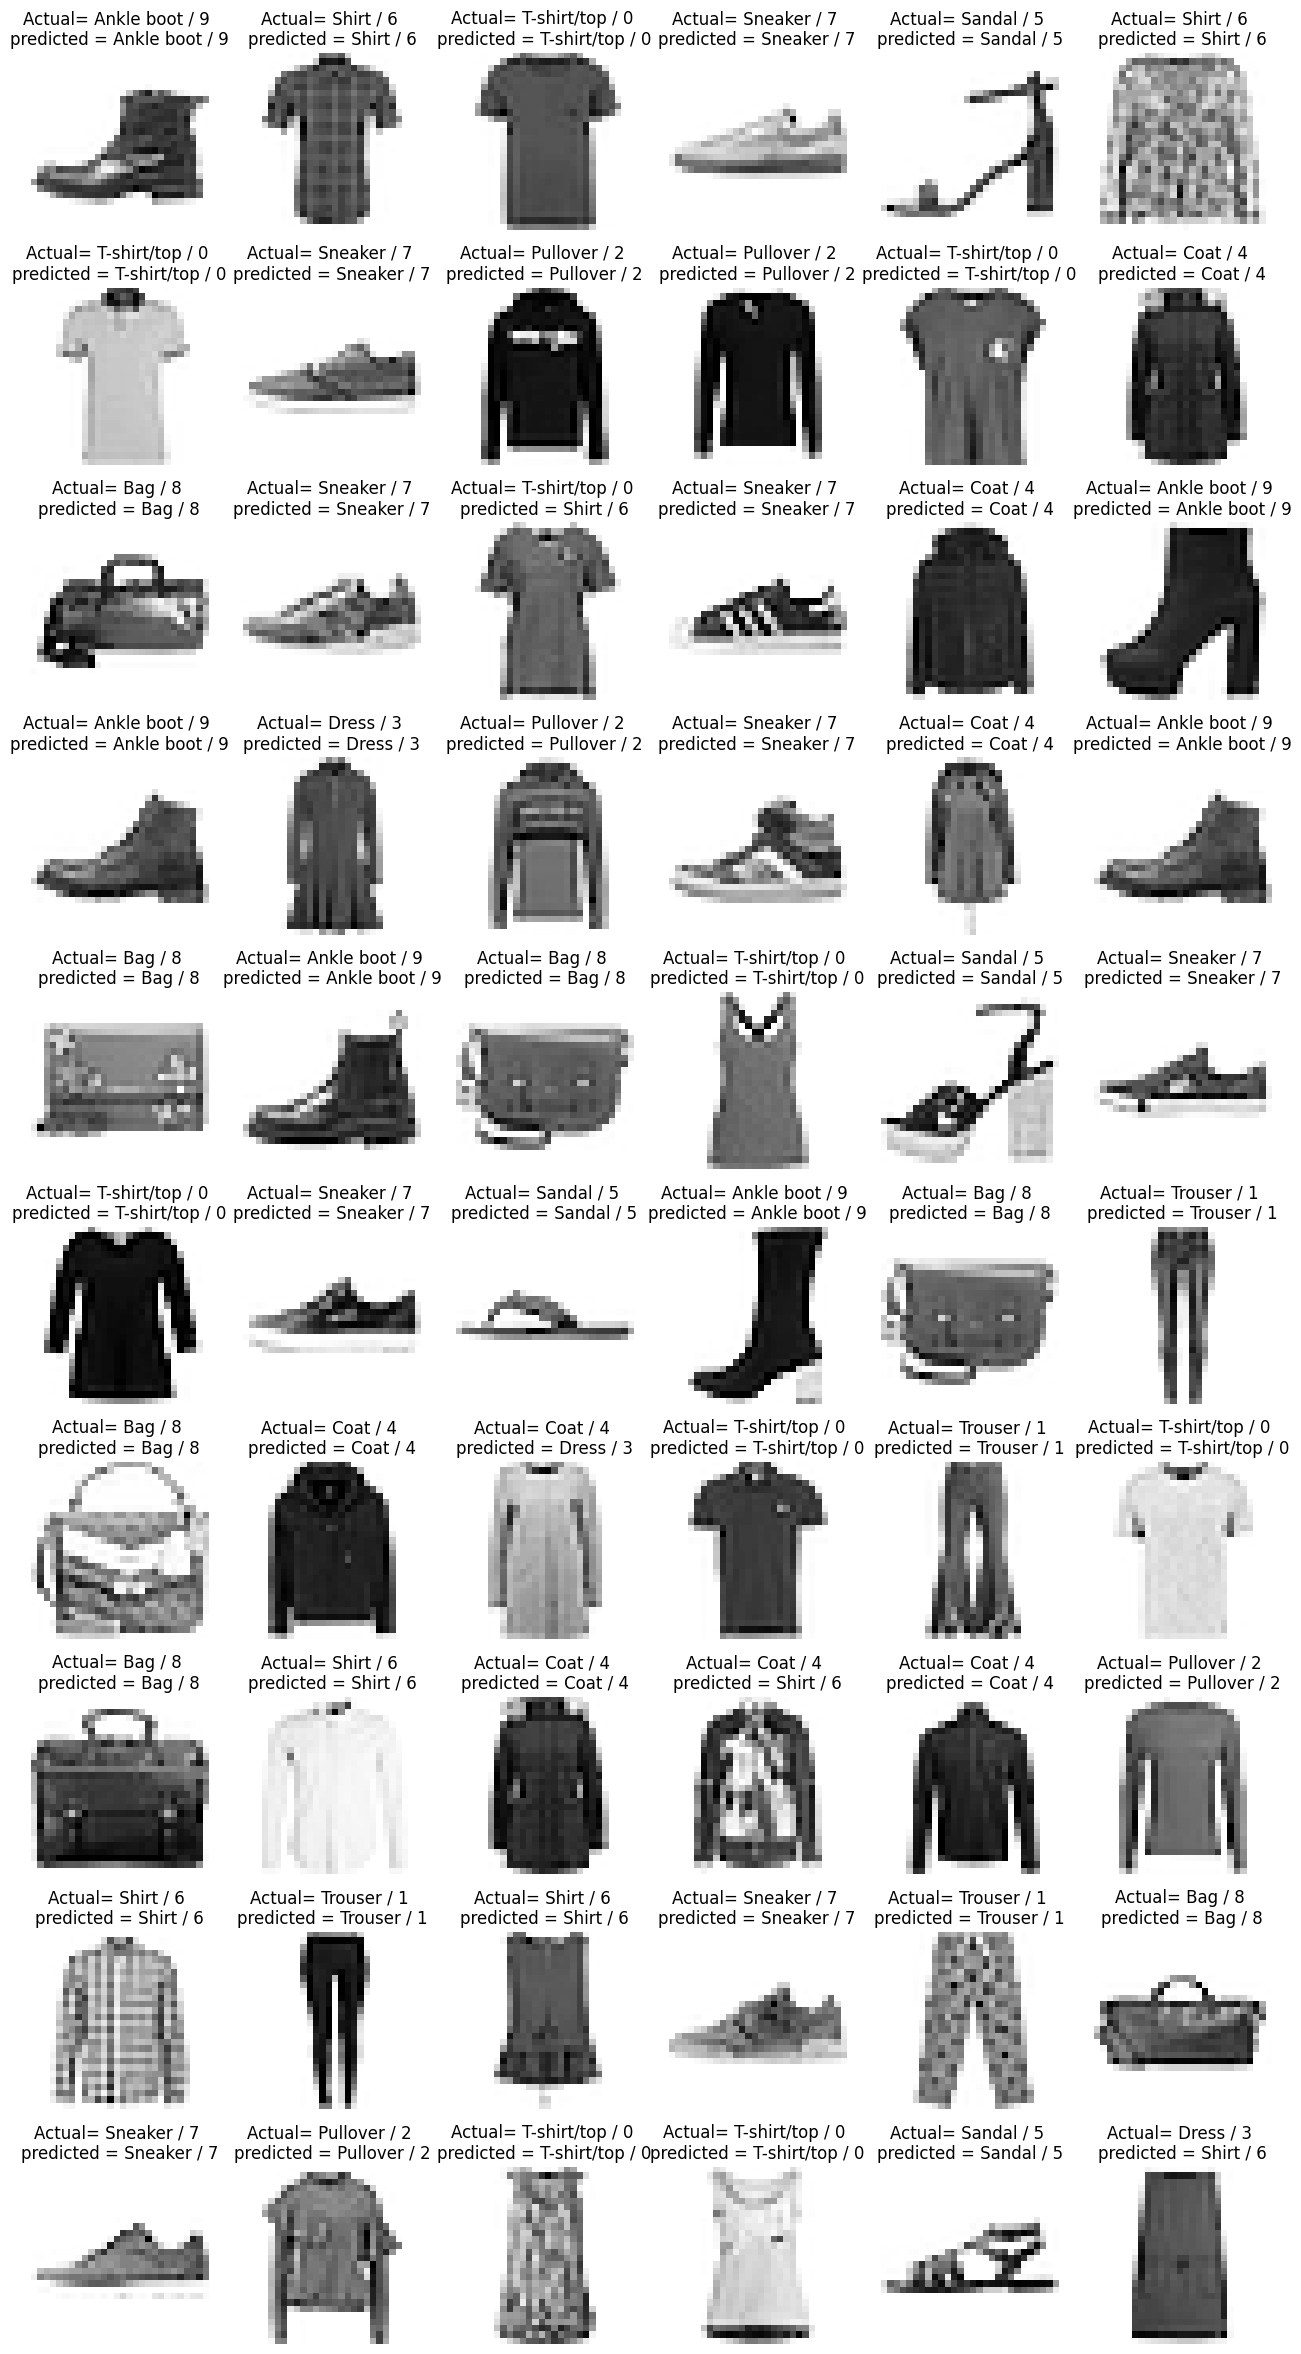

In [29]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000, 60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('Actual= {} / {} \npredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

Confusion Matrix

<Axes: >

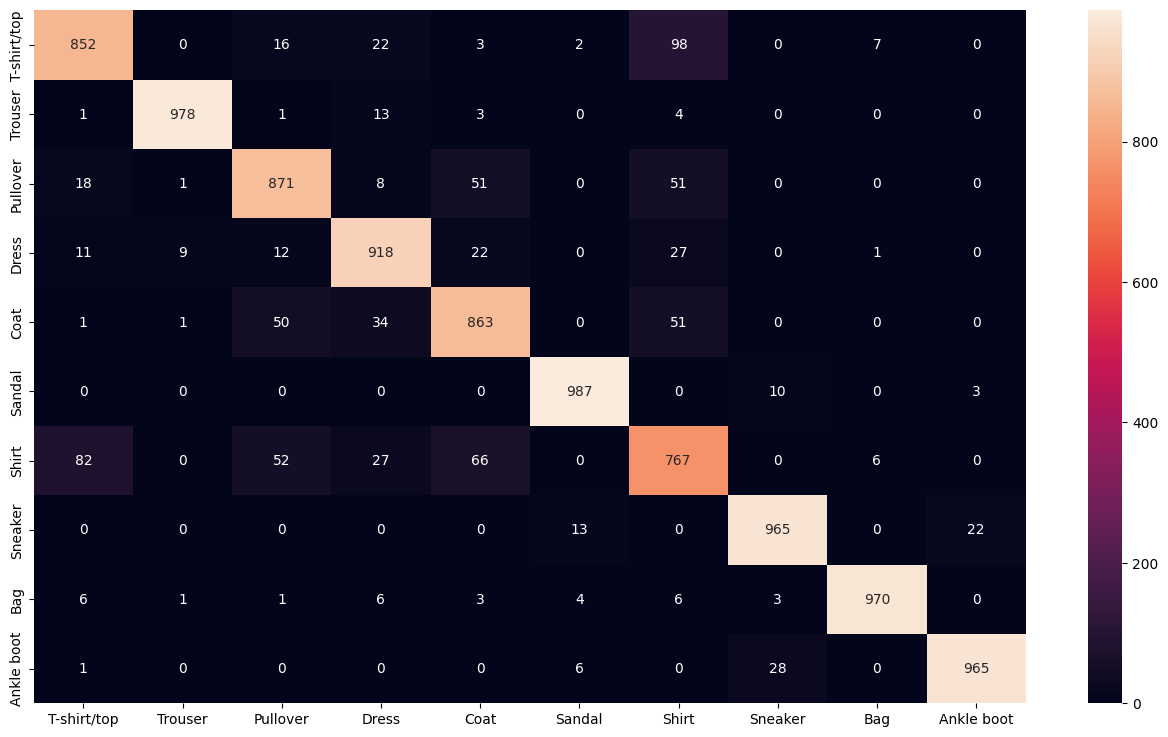

In [30]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test, y_pred_labels)

sns.heatmap(cm, annot=True, fmt='d' , xticklabels=class_labels, yticklabels=class_labels)

In [31]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.85      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.87      0.87      0.87      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.85      0.86      0.86      1000
      Sandal       0.98      0.99      0.98      1000
       Shirt       0.76      0.77      0.77      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Model save and deploy

In [32]:
model.save('fashion_classification_cnn.h5')

In [33]:
model_deploy=keras.models.load_model('fashion_classification_cnn.h5')

In [34]:
class_labels[np.argmax(model_deploy.predict(np.expand_dims(X_test[0],axis=0)))]

1/1 [==============================] - 0s 103ms/step


'Ankle boot'

CNN- complex network

In [35]:
cnn_model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid', activation='relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [36]:
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
cnn_model2.fit(X_train, y_train, epochs=40, batch_size=512, verbose=1, validation_data=(X_val,y_val))

Epoch 1/40
94/94 [==============================] - 4s 33ms/step - loss: 1.0399 - accuracy: 0.6127 - val_loss: 0.5964 - val_accuracy: 0.7681
Epoch 2/40
94/94 [==============================] - 3s 31ms/step - loss: 0.5566 - accuracy: 0.7886 - val_loss: 0.4558 - val_accuracy: 0.8270
Epoch 3/40
94/94 [==============================] - 2s 26ms/step - loss: 0.4598 - accuracy: 0.8296 - val_loss: 0.4019 - val_accuracy: 0.8467
Epoch 4/40
94/94 [==============================] - 2s 26ms/step - loss: 0.4062 - accuracy: 0.8495 - val_loss: 0.3602 - val_accuracy: 0.8661
Epoch 5/40
94/94 [==============================] - 3s 28ms/step - loss: 0.3676 - accuracy: 0.8652 - val_loss: 0.3514 - val_accuracy: 0.8686
Epoch 6/40
94/94 [==============================] - 2s 22ms/step - loss: 0.3394 - accuracy: 0.8759 - val_loss: 0.3245 - val_accuracy: 0.8803
Epoch 7/40
94/94 [==============================] - 2s 24ms/step - loss: 0.3182 - accuracy: 0.8832 - val_loss: 0.3123 - val_accuracy: 0.8817
Epoch 8/40
94

In [38]:
cnn_model2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2958 - accuracy: 0.9107


[0.2957504093647003, 0.9107000231742859]

More complex model

In [39]:
cnn_model3 = keras.models.Sequential([
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units=256, activation='relu'),
                         keras.layers.Dropout(0.25),                        
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dropout(0.10),                         
                         keras.layers.Dense(units=10, activation='softmax')
                         ])

In [40]:
cnn_model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
cnn_model3.fit(X_train, y_train, epochs=40, batch_size=512, verbose=1, validation_data=(X_val,y_val))

Epoch 1/40
94/94 [==============================] - 6s 46ms/step - loss: 1.1547 - accuracy: 0.5501 - val_loss: 0.5946 - val_accuracy: 0.7679
Epoch 2/40
94/94 [==============================] - 5s 50ms/step - loss: 0.5795 - accuracy: 0.7818 - val_loss: 0.4674 - val_accuracy: 0.8270
Epoch 3/40
94/94 [==============================] - 5s 51ms/step - loss: 0.4696 - accuracy: 0.8308 - val_loss: 0.3981 - val_accuracy: 0.8514
Epoch 4/40
94/94 [==============================] - 5s 50ms/step - loss: 0.4026 - accuracy: 0.8559 - val_loss: 0.3559 - val_accuracy: 0.8688
Epoch 5/40
94/94 [==============================] - 4s 48ms/step - loss: 0.3582 - accuracy: 0.8734 - val_loss: 0.3266 - val_accuracy: 0.8825
Epoch 6/40
94/94 [==============================] - 5s 51ms/step - loss: 0.3260 - accuracy: 0.8861 - val_loss: 0.3154 - val_accuracy: 0.8857
Epoch 7/40
94/94 [==============================] - 5s 53ms/step - loss: 0.3088 - accuracy: 0.8913 - val_loss: 0.3045 - val_accuracy: 0.8914
Epoch 8/40
94

In [42]:
cnn_model3.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3958 - accuracy: 0.9033


[0.39584848284721375, 0.9032999873161316]